In [12]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats

In [13]:
NumOfData=pd.read_csv('C:/Users/bigcompetmgr01/프로젝트/연료모드별로자른data/AmountOfDataAll',sep=',')
NumOfData=NumOfData.set_index('Unnamed: 0')
NumOfData

,test_normal,test_abnormal,train_normal,train_abnormal
Unnamed: 0,,,,
mode 2,54,34,19,22
mode 3,31,31,172,706


In [31]:
for i in range(int(NumOfData['train_normal'].iloc[0])):
    s1="df_%d=pd.read_csv('C:/Users/bigcompetmgr01/프로젝트/연료모드별로자른data/train_normal_mode2_%d')" %(i+1,i+1)
    exec(s1)
df=pd.concat([df_1])
for i in range(int(NumOfData['train_normal'].iloc[0])-1):
    s2="df=pd.concat([df,df_%d],ignore_index=True)" %(i+2)
    exec(s2)
pd.set_option('display.max_columns',1000)
pd.set_option('display.width',1000)
train_normal_mode2_all=df
train_normal_mode2_all # 전처리된 train 데이터의 정상 데이터 중 연료모드 2에 해당하는 데이터 전체

,"Air temp, TC inlet (TE29)",Base duration gas admission,"Charge Air press, Engine Inlet (PT21X)","Charge Air temp, Engine Inlet (TE21X)",DVT control air press (PT43),Engine Load percent,Engine Speed 1 (SE11),Exh. Gas temp average,"Exh. Gas temp, TC Inlet","Exh. Gas temp, TC Outlet",FO Pressure Engine Inlet,FO Temperature Engine Inlet,"Gas press, Engine Inlet (PT87)",Gas temp (TE81),"HT CW temp, Engine Inlet (TE75)","HT CW temp, Engine Outlet (TE76)",IMEP average,"LT CW press, Air Cooler Inlet (PT71)","LT CW temp, Air Cooler Inlet (TE71)","LT CW temp, Air Cooler Outlet (TE72)",Main bearing temp average,Pmax average,TC speed,Waste Gate Valve position command (CV26),dateTime
0,31.901667,0.0,5.238217,48.056667,5.543367,100.166667,719.903333,521.393333,541.708333,332.535000,5.355000,33.000000,4.283167,21.423333,76.748333,82.636667,23.351167,3.0,41.160000,46.151667,87.650152,161.434333,25155.35,0.0,2019-09-01 22:44:19
1,31.900000,0.0,5.238417,48.056667,5.543417,100.165000,719.901667,521.403333,541.656667,332.446667,5.354333,33.000000,4.285833,21.431667,76.748333,82.636667,23.350500,3.0,41.158333,46.151667,87.652273,161.437167,25155.70,0.0,2019-09-01 22:44:20
2,31.898333,0.0,5.238617,48.056667,5.543467,100.161667,719.900000,521.413333,541.605000,332.358333,5.353667,33.000000,4.288333,21.440000,76.748333,82.636667,23.349833,3.0,41.155000,46.151667,87.654242,161.439333,25155.85,0.0,2019-09-01 22:44:21
3,31.896667,0.0,5.238717,48.056667,5.543517,100.158333,719.898333,521.423333,541.553333,332.270000,5.353000,33.000000,4.290833,21.448333,76.748333,82.636667,23.349167,3.0,41.151667,46.151667,87.656364,161.441500,25156.00,0.0,2019-09-01 22:44:22
4,31.895000,0.0,5.238817,48.056667,5.543567,100.156667,719.896667,521.420000,541.501667,332.186667,5.352500,33.000000,4.293167,21.456667,76.748333,82.636667,23.348667,3.0,41.150000,46.151667,87.658485,161.443500,25156.05,0.0,2019-09-01 22:44:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,28.000000,0.0,5.312717,49.000000,7.043650,99.915000,720.071667,512.366667,529.321667,320.363333,10.400167,60.003333,4.400000,33.000000,75.921667,84.615000,23.226333,3.0,41.750000,46.961667,88.282273,156.980167,25111.70,0.0,2019-10-02 00:00:15
23550,28.000000,0.0,5.312267,49.000000,7.043717,99.901667,720.071667,512.345000,529.308333,320.358333,10.400333,60.003333,4.400000,33.000000,75.921667,84.620000,23.223500,3.0,41.751667,46.963333,88.282273,156.968333,25110.65,0.0,2019-10-02 00:00:16
23551,28.000000,0.0,5.311767,49.000000,7.043800,99.888333,720.070000,512.323333,529.295000,320.353333,10.400500,60.003333,4.400000,33.000000,75.920000,84.625000,23.220667,3.0,41.753333,46.965000,88.282273,156.957167,25109.60,0.0,2019-10-02 00:00:17
23552,28.000000,0.0,5.311267,49.000000,7.043883,99.875000,720.068333,512.298333,529.281667,320.348333,10.400667,60.003333,4.400000,33.000000,75.918333,84.630000,23.217500,3.0,41.755000,46.966667,88.282273,156.944667,25108.45,0.0,2019-10-02 00:00:18


In [4]:
LTCWT_normal = train_normal_mode2_all[['LT CW temp, Air Cooler Inlet (TE71)']] # AirCooler System LT line Cooling water temperature
LTCWT_normal['LT CW temp, Air Cooler Inlet (TE71)'] = pd.to_numeric(LTCWT_normal['LT CW temp, Air Cooler Inlet (TE71)'])
LTCWT_normal_feature=LTCWT_normal.describe() # AirCooler 시스템의 입력 냉각수 온도 관련 통계치
LTCWT_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"LT CW temp, Air Cooler Inlet (TE71)"
count,23554.000000
mean,41.980870
std,0.430355
min,40.753333
25%,41.896667
50%,42.000000
75%,42.021667
max,46.011667


In [5]:
scaler = StandardScaler() #냉각수 온도 데이터 표준화
scaler.fit(LTCWT_normal)
LTCWT_scaled = scaler.transform(LTCWT_normal)
LTCWT_df_scaled = pd.DataFrame(data=LTCWT_scaled, columns=['냉각수온도'])
LTCWT_df_scaled

,냉각수온도
0,-1.907467
1,-1.911340
2,-1.919086
3,-1.926832
4,-1.930705
...,...
23549,-0.536476
23550,-0.532603
23551,-0.528731
23552,-0.524858


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

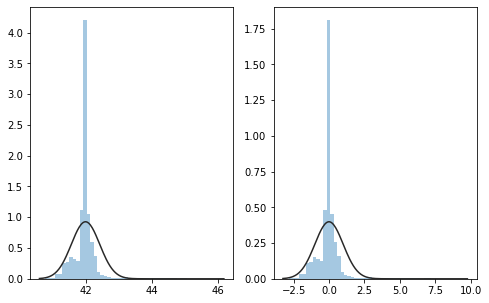

In [6]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0 = LTCWT_normal['LT CW temp, Air Cooler Inlet (TE71)'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1 = LTCWT_df_scaled['냉각수온도'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [7]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CW = x1.tolist()
Z_score_CW_table = pd.DataFrame(data=Z_score_CW,columns=['z-score'])
Z_score2_CW = []
for i in range(len(Z_score_CW)):
    if Z_score_CW[i] < 0:
        Z_score2_CW.append(Z_score_CW[i]/Z_score_CW_table.min().item())
    else:
        Z_score2_CW.append(Z_score_CW[i]/Z_score_CW_table.max().item())
Z_score2_CW_table = pd.DataFrame(data=Z_score2_CW,columns=['z-score2'])     
Z_score3_CW = []
for i in range(len(Z_score2_CW)):
    Z_score3_CW.append(1-Z_score2_CW[i])
Z_score3_CW
Z_score3_CW_table = pd.DataFrame(data=Z_score3_CW,columns=['z-score3'])
Z_score3_CW_table

,z-score3
0,0.331287
1,0.329929
2,0.327214
3,0.324498
4,0.323140
...,...
23549,0.811924
23550,0.813282
23551,0.814639
23552,0.815997


In [8]:
HTCWT_normal = train_normal_mode2_all[['HT CW temp, Engine Inlet (TE75)']] # Combution/Coolingwater System HT line Cooling water temperature
HTCWT_normal['HT CW temp, Engine Inlet (TE75)'] = pd.to_numeric(HTCWT_normal['HT CW temp, Engine Inlet (TE75)'])
HTCWT_normal_feature=HTCWT_normal.describe() # Combution/Coolingwater 시스템의 입력 냉각수 온도 관련 통계치
HTCWT_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"HT CW temp, Engine Inlet (TE75)"
count,23554.000000
mean,74.220532
std,1.995667
min,67.683333
25%,72.878333
50%,74.540000
75%,76.087917
max,76.928333


In [9]:
scaler2 = StandardScaler() #냉각수 온도2 데이터 표준화
scaler2.fit(HTCWT_normal)
HTCWT_scaled = scaler2.transform(HTCWT_normal)
HTCWT_df_scaled = pd.DataFrame(data=HTCWT_scaled, columns=['냉각수온도2'])
HTCWT_df_scaled

,냉각수온도2
0,1.266671
1,1.266671
2,1.266671
3,1.266671
4,1.266671
...,...
23549,0.852432
23550,0.852432
23551,0.851597
23552,0.850762


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

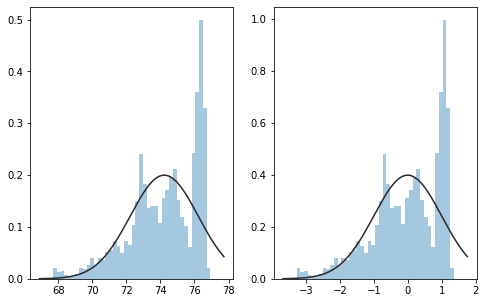

In [10]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_2 = HTCWT_normal['HT CW temp, Engine Inlet (TE75)'].dropna().values
sns.distplot(x0_2, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_2 = HTCWT_df_scaled['냉각수온도2'].values
sns.distplot(x1_2, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [11]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CW2 = x1_2.tolist()
Z_score_CW2_table = pd.DataFrame(data=Z_score_CW2,columns=['z-score'])
Z_score2_CW2 = []
for i in range(len(Z_score_CW2)):
    if Z_score_CW2[i] < 0:
        Z_score2_CW2.append(Z_score_CW2[i]/Z_score_CW2_table.min().item())
    else:
        Z_score2_CW2.append(Z_score_CW2[i]/Z_score_CW2_table.max().item())
Z_score2_CW2_table = pd.DataFrame(data=Z_score2_CW2,columns=['z-score2'])     
Z_score3_CW2 = []
for i in range(len(Z_score2_CW2)):
    Z_score3_CW2.append(1-Z_score2_CW2[i])
Z_score3_CW2
Z_score3_CW2_table = pd.DataFrame(data=Z_score3_CW2,columns=['z-score3'])
Z_score3_CW2_table

,z-score3
0,0.066475
1,0.066475
2,0.066475
3,0.066475
4,0.066475
...,...
23549,0.371765
23550,0.371765
23551,0.372381
23552,0.372996


In [12]:
CAP_normal = train_normal_mode2_all[['Charge Air press, Engine Inlet (PT21X)']] # CAP = Charge Air Pressure
CAP_normal['Charge Air press, Engine Inlet (PT21X)'] = pd.to_numeric(CAP_normal['Charge Air press, Engine Inlet (PT21X)'])
CAP_normal_feature=CAP_normal.describe() # 소기 공기 압력 관련 통계치
CAP_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Charge Air press, Engine Inlet (PT21X)"
count,23554.000000
mean,5.220165
std,0.036646
min,5.099517
25%,5.204783
50%,5.227583
75%,5.238117
max,5.320467


In [13]:
scaler3 = StandardScaler() #소기공기 압력 데이터 표준화
scaler3.fit(CAP_normal)
CAP_scaled = scaler3.transform(CAP_normal)
CAP_df_scaled = pd.DataFrame(data=CAP_scaled, columns=['소기공기압력'])
CAP_df_scaled

,소기공기압력
0,0.492601
1,0.498059
2,0.503517
3,0.506246
4,0.508975
...,...
23549,2.525593
23550,2.513313
23551,2.499669
23552,2.486025


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

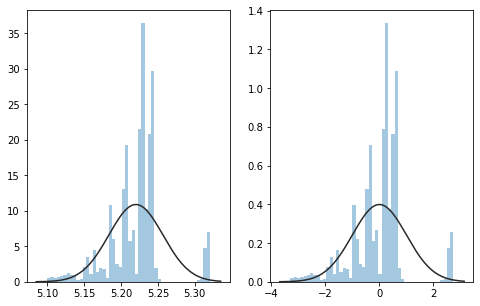

In [14]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_3 = CAP_normal['Charge Air press, Engine Inlet (PT21X)'].dropna().values
sns.distplot(x0_3, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_3 = CAP_df_scaled['소기공기압력'].values
sns.distplot(x1_3, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [15]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CAP = x1_3.tolist()
Z_score_CAP_table = pd.DataFrame(data=Z_score_CAP,columns=['z-score'])
Z_score2_CAP = []
for i in range(len(Z_score_CAP)):
    if Z_score_CAP[i] < 0:
        Z_score2_CAP.append(Z_score_CAP[i]/Z_score_CAP_table.min().item())
    else:
        Z_score2_CAP.append(Z_score_CAP[i]/Z_score_CAP_table.max().item())
Z_score2_CAP_table = pd.DataFrame(data=Z_score2_CAP,columns=['z-score2'])     
Z_score3_CAP = []
for i in range(len(Z_score2_CAP)):
    Z_score3_CAP.append(1-Z_score2_CAP[i])
Z_score3_CAP
Z_score3_CAP_table = pd.DataFrame(data=Z_score3_CAP,columns=['z-score3'])
Z_score3_CAP_table

,z-score3
0,0.820027
1,0.818033
2,0.816039
3,0.815042
4,0.814045
...,...
23549,0.077267
23550,0.081753
23551,0.086738
23552,0.091723


In [16]:
CAT_normal = train_normal_mode2_all[['Charge Air temp, Engine Inlet (TE21X)']] # CAT = Charge Air Temperature
CAT_normal['Charge Air temp, Engine Inlet (TE21X)'] = pd.to_numeric(CAT_normal['Charge Air temp, Engine Inlet (TE21X)'])
CAT_feature_normal=CAT_normal.describe() # 소기 공기 온도 관련 통계치
CAT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Charge Air temp, Engine Inlet (TE21X)"
count,23554.000000
mean,49.003172
std,0.193362
min,48.020000
25%,49.000000
50%,49.000000
75%,49.000000
max,50.700000


In [17]:
scaler4 = StandardScaler() #소기공기 온도 데이터 표준화
scaler4.fit(CAT_normal)
CAT_scaled = scaler4.transform(CAT_normal)
CAT_df_scaled = pd.DataFrame(data=CAT_scaled, columns=['소기공기온도'])
CAT_df_scaled

,소기공기온도
0,-4.895107
1,-4.895107
2,-4.895107
3,-4.895107
4,-4.895107
...,...
23549,-0.016407
23550,-0.016407
23551,-0.016407
23552,-0.016407


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

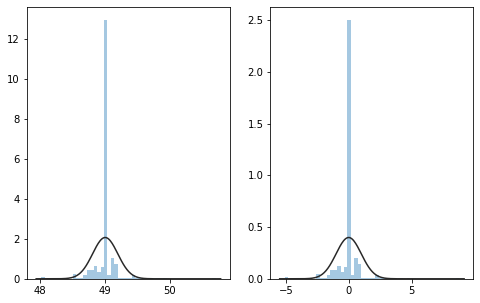

In [18]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_4 = CAT_normal['Charge Air temp, Engine Inlet (TE21X)'].dropna().values
sns.distplot(x0_4, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_4 = CAT_df_scaled['소기공기온도'].values
sns.distplot(x1_4, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [19]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CAT = x1_4.tolist()
Z_score_CAT_table = pd.DataFrame(data=Z_score_CAT,columns=['z-score'])
Z_score2_CAT = []
for i in range(len(Z_score_CAT)):
    if Z_score_CAT[i] < 0:
        Z_score2_CAT.append(Z_score_CAT[i]/Z_score_CAT_table.min().item())
    else:
        Z_score2_CAT.append(Z_score_CAT[i]/Z_score_CAT_table.max().item())
Z_score2_CAT_table = pd.DataFrame(data=Z_score2_CAT,columns=['z-score2'])     
Z_score3_CAT = []
for i in range(len(Z_score2_CAT)):
    Z_score3_CAT.append(1-Z_score2_CAT[i])
Z_score3_CAT
Z_score3_CAT_table = pd.DataFrame(data=Z_score3_CAT,columns=['z-score3'])
Z_score3_CAT_table

,z-score3
0,0.037294
1,0.037294
2,0.037294
3,0.037294
4,0.037294
...,...
23549,0.996773
23550,0.996773
23551,0.996773
23552,0.996773


In [20]:
BT_normal = train_normal_mode2_all[['Main bearing temp average']] # BT = Bearing Temperature
BT_normal['Main bearing temp average'] = pd.to_numeric(BT_normal['Main bearing temp average'])
BT_feature_normal=BT_normal.describe() #베어링 온도 관련 통계치
BT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Main bearing temp average
count,23554.000000
mean,88.035821
std,0.102491
min,87.195000
25%,87.986212
50%,88.023636
75%,88.089545
max,88.322424


In [21]:
scaler5 = StandardScaler() #베어링 온도 데이터 표준화
scaler5.fit(BT_normal)
BT_scaled = scaler5.transform(BT_normal)
BT_df_scaled = pd.DataFrame(data=BT_scaled, columns=['베어링온도'])
BT_df_scaled

,베어링온도
0,-3.763023
1,-3.742326
2,-3.723108
3,-3.702411
4,-3.681714
...,...
23549,2.404662
23550,2.404662
23551,2.404662
23552,2.404662


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

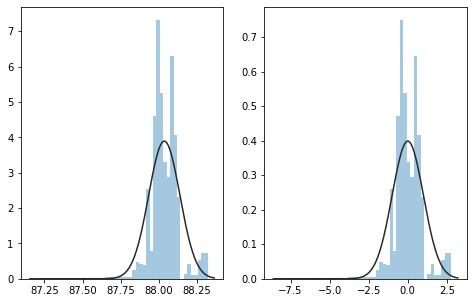

In [22]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_5 = BT_normal['Main bearing temp average'].dropna().values
sns.distplot(x0_5, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_5 = BT_df_scaled['베어링온도'].values
sns.distplot(x1_5, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [23]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
#베어링 온도는 단측검정이므로 음수일 때는 만점(1점)을 부여하고 양수일 때만 따지도록 한다 
Z_score_BT = x1_5.tolist()
Z_score_BT_table = pd.DataFrame(data=Z_score_BT,columns=['z-score'])
Z_score2_BT = []
for i in range(len(Z_score_BT)):
    if Z_score_BT[i] < 0:
        Z_score2_BT.append(0)
    else:
        Z_score2_BT.append(Z_score_BT[i]/Z_score_BT_table.max().item())
Z_score2_BT_table = pd.DataFrame(data=Z_score2_BT,columns=['z-score2'])     
Z_score3_BT = []
for i in range(len(Z_score2_BT)):
    Z_score3_BT.append(1-Z_score2_BT[i])
Z_score3_BT
Z_score3_BT_table = pd.DataFrame(data=Z_score3_BT,columns=['z-score3'])
Z_score3_BT_table

,z-score3
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
23549,0.140094
23550,0.140094
23551,0.140094
23552,0.140094


In [24]:
LTCWP_normal = train_normal_mode2_all[['LT CW press, Air Cooler Inlet (PT71)']] # AirCooler System LT line Cooling water pressure
LTCWP_normal['LT CW press, Air Cooler Inlet (PT71)'] = pd.to_numeric(LTCWP_normal['LT CW press, Air Cooler Inlet (PT71)'])
LTCWP_normal_feature=LTCWP_normal.describe() # AirCooler 시스템의 입력 냉각수 압력 관련 통계치
LTCWP_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"LT CW press, Air Cooler Inlet (PT71)"
count,23554.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


In [25]:
scaler6 = StandardScaler() #냉각수 압력 데이터 표준화
scaler6.fit(LTCWP_normal)
LTCWP_scaled = scaler6.transform(LTCWP_normal)
LTCWP_df_scaled = pd.DataFrame(data=LTCWP_scaled, columns=['냉각수압력'])
LTCWP_df_scaled

,냉각수압력
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
23549,0.0
23550,0.0
23551,0.0
23552,0.0


In [26]:
#분포를 보아 항상 일정한 값을 가지므로 최종점수에 만점(1점)을 부여한다<Z-score3>
Z_score3_LTCWP=[]
for i in range(len(LTCWP_normal)):
    Z_score3_LTCWP.append(1)
Z_score3_LTCWP
Z_score3_LTCWP_table = pd.DataFrame(data=Z_score3_LTCWP,columns=['z-score3'])
Z_score3_LTCWP_table

,z-score3
0,1
1,1
2,1
3,1
4,1
...,...
23549,1
23550,1
23551,1
23552,1


In [27]:
GP_normal = train_normal_mode2_all[['Gas press, Engine Inlet (PT87)']] # GP = Gas Pressure
GP_normal['Gas press, Engine Inlet (PT87)'] = pd.to_numeric(GP_normal['Gas press, Engine Inlet (PT87)'])
GP_feature_normal=GP_normal.describe() # 가스압력 관련 통계치
GP_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Gas press, Engine Inlet (PT87)"
count,23554.000000
mean,4.314550
std,0.043283
min,4.197167
25%,4.300000
50%,4.300000
75%,4.318500
max,4.400000


In [28]:
scaler7 = StandardScaler() #가스압력 데이터 표준화
scaler7.fit(GP_normal)
GP_scaled = scaler7.transform(GP_normal)
GP_df_scaled = pd.DataFrame(data=GP_scaled, columns=['가스압력'])
GP_df_scaled

,가스압력
0,-0.725097
1,-0.663486
2,-0.605726
3,-0.547965
4,-0.494055
...,...
23549,1.974241
23550,1.974241
23551,1.974241
23552,1.974241


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

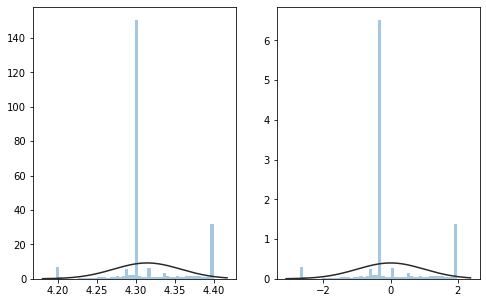

In [29]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_7 = GP_normal['Gas press, Engine Inlet (PT87)'].dropna().values
sns.distplot(x0_7, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_7 = GP_df_scaled['가스압력'].values
sns.distplot(x1_7, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [30]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_GP = x1_7.tolist()
Z_score_GP_table = pd.DataFrame(data=Z_score_GP,columns=['z-score'])
Z_score2_GP = []
for i in range(len(Z_score_GP)):
    if Z_score_GP[i] < 0:
        Z_score2_GP.append(Z_score_GP[i]/Z_score_GP_table.min().item())
    else:
        Z_score2_GP.append(Z_score_GP[i]/Z_score_GP_table.max().item())
Z_score2_GP_table = pd.DataFrame(data=Z_score2_GP,columns=['z-score2'])     
Z_score3_GP = []
for i in range(len(Z_score2_GP)):
    Z_score3_GP.append(1-Z_score2_GP[i])
Z_score3_GP
Z_score3_GP_table = pd.DataFrame(data=Z_score3_GP,columns=['z-score3'])
Z_score3_GP_table

,z-score3
0,0.732639
1,0.755357
2,0.776655
3,0.797952
4,0.817830
...,...
23549,0.000000
23550,0.000000
23551,0.000000
23552,0.000000


In [4]:
GT_normal = train_normal_mode2_all[['Gas temp (TE81)']] # GT = Gas Temperature
GT_normal['Gas temp (TE81)'] = pd.to_numeric(GT_normal['Gas temp (TE81)'])
GT_feature_normal=GT_normal.describe() # 가스온도 관련 통계치
GT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gas temp (TE81)
count,23554.000000
mean,33.510545
std,1.665793
min,21.423333
25%,33.000000
50%,33.000000
75%,34.000000
max,37.000000


In [5]:
scaler8 = StandardScaler() #가스온도 데이터 표준화
scaler8.fit(GT_normal)
GT_scaled = scaler8.transform(GT_normal)
GT_df_scaled = pd.DataFrame(data=GT_scaled, columns=['가스온도'])
GT_df_scaled

,가스온도
0,-7.256285
1,-7.251283
2,-7.246280
3,-7.241277
4,-7.236274
...,...
23549,-0.306494
23550,-0.306494
23551,-0.306494
23552,-0.306494


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

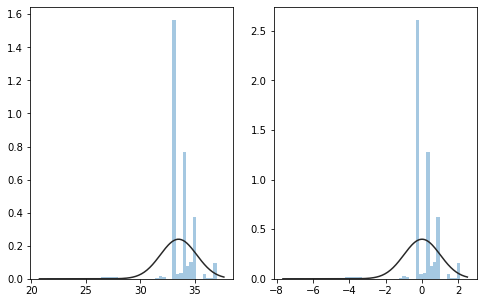

In [6]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_8 = GT_normal['Gas temp (TE81)'].dropna().values
sns.distplot(x0_8, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_8 = GT_df_scaled['가스온도'].values
sns.distplot(x1_8, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [7]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_GT = x1_8.tolist()
Z_score_GT_table = pd.DataFrame(data=Z_score_GT,columns=['z-score'])
Z_score2_GT = []
for i in range(len(Z_score_GT)):
    if Z_score_GT[i] < 0:
        Z_score2_GT.append(Z_score_GT[i]/Z_score_GT_table.min().item())
    else:
        Z_score2_GT.append(Z_score_GT[i]/Z_score_GT_table.max().item())
Z_score2_GT_table = pd.DataFrame(data=Z_score2_GT,columns=['z-score2'])     
Z_score3_GT = []
for i in range(len(Z_score2_GT)):
    Z_score3_GT.append(1-Z_score2_GT[i])
Z_score3_GT
Z_score3_GT_table = pd.DataFrame(data=Z_score3_GT,columns=['z-score3'])
Z_score3_GT_table

,z-score3
0,0.000000
1,0.000689
2,0.001379
3,0.002068
4,0.002758
...,...
23549,0.957762
23550,0.957762
23551,0.957762
23552,0.957762


In [5]:
HCWT_normal = train_normal_mode2_all[['HT CW temp, Engine Outlet (TE76)']] # HCWT = HT CW Temperature
HCWT_normal['HT CW temp, Engine Outlet (TE76)'] = pd.to_numeric(HCWT_normal['HT CW temp, Engine Outlet (TE76)'])
HCWT_feature_normal=HCWT_normal.describe() # 냉각수온도 관련 통계치
HCWT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"HT CW temp, Engine Outlet (TE76)"
count,23554.000000
mean,86.607944
std,1.404528
min,82.433333
25%,85.600000
50%,87.200000
75%,87.705000
max,88.473333


In [7]:
scaler9 = StandardScaler() #냉각수온도 데이터 표준화
scaler9.fit(HCWT_normal)
HCWT_scaled = scaler9.transform(HCWT_normal)
HCWT_df_scaled = pd.DataFrame(data=HCWT_scaled, columns=['냉각수온도'])
HCWT_df_scaled

,냉각수온도
0,-2.827541
1,-2.827541
2,-2.827541
3,-2.827541
4,-2.827541
...,...
23549,-1.418972
23550,-1.415412
23551,-1.411852
23552,-1.408292


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

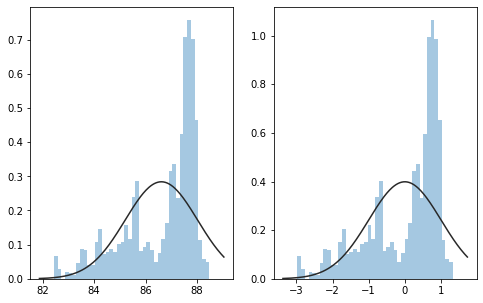

In [9]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_9 = HCWT_normal['HT CW temp, Engine Outlet (TE76)'].dropna().values
sns.distplot(x0_9, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_9 = HCWT_df_scaled['냉각수온도'].values
sns.distplot(x1_9, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [10]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_HCWT = x1_9.tolist()
Z_score_HCWT_table = pd.DataFrame(data=Z_score_HCWT,columns=['z-score'])
Z_score2_HCWT = []
for i in range(len(Z_score_HCWT)):
    if Z_score_HCWT[i] < 0:
        Z_score2_HCWT.append(Z_score_HCWT[i]/Z_score_HCWT_table.min().item())
    else:
        Z_score2_HCWT.append(Z_score_HCWT[i]/Z_score_HCWT_table.max().item())
Z_score2_HCWT_table = pd.DataFrame(data=Z_score2_HCWT,columns=['z-score2'])     
Z_score3_HCWT = []
for i in range(len(Z_score2_HCWT)):
    Z_score3_HCWT.append(1-Z_score2_HCWT[i])
Z_score3_HCWT
Z_score3_HCWT_table = pd.DataFrame(data=Z_score3_HCWT,columns=['z-score3'])
Z_score3_HCWT_table

,z-score3
0,0.048707
1,0.048707
2,0.048707
3,0.048707
4,0.048707
...,...
23549,0.522604
23550,0.523801
23551,0.524999
23552,0.526197


In [11]:
LCWT_normal = train_normal_mode2_all[['LT CW temp, Air Cooler Outlet (TE72)']] # LCWT = LT CW Temperature
LCWT_normal['LT CW temp, Air Cooler Outlet (TE72)'] = pd.to_numeric(LCWT_normal['LT CW temp, Air Cooler Outlet (TE72)'])
LCWT_feature_normal=LCWT_normal.describe() # 냉각수온도 관련 통계치
LCWT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"LT CW temp, Air Cooler Outlet (TE72)"
count,23554.000000
mean,46.854526
std,0.386201
min,45.966667
25%,46.658333
50%,46.855000
75%,47.000000
max,49.910000


In [16]:
scaler10 = StandardScaler() #냉각수온도 데이터 표준화
scaler10.fit(LCWT_normal)
LCWT_scaled = scaler10.transform(LCWT_normal)
LCWT_df_scaled = pd.DataFrame(data=LCWT_scaled, columns=['냉각수온도'])
LCWT_df_scaled

,냉각수온도
0,-1.819969
1,-1.819969
2,-1.819969
3,-1.819969
4,-1.819969
...,...
23549,0.277429
23550,0.281745
23551,0.286060
23552,0.290376


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

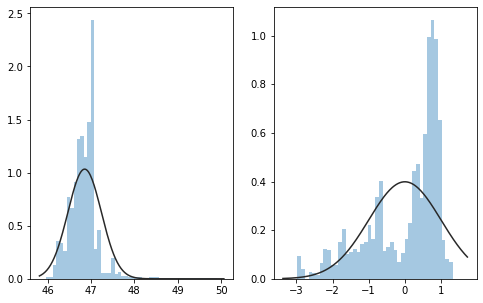

In [17]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_10 = LCWT_normal['LT CW temp, Air Cooler Outlet (TE72)'].dropna().values
sns.distplot(x0_10, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_10 = HCWT_df_scaled['냉각수온도'].values
sns.distplot(x1_10, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [18]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_LCWT = x1_10.tolist()
Z_score_LCWT_table = pd.DataFrame(data=Z_score_LCWT,columns=['z-score'])
Z_score2_LCWT = []
for i in range(len(Z_score_LCWT)):
    if Z_score_LCWT[i] < 0:
        Z_score2_LCWT.append(Z_score_LCWT[i]/Z_score_LCWT_table.min().item())
    else:
        Z_score2_LCWT.append(Z_score_LCWT[i]/Z_score_LCWT_table.max().item())
Z_score2_LCWT_table = pd.DataFrame(data=Z_score2_LCWT,columns=['z-score2'])     
Z_score3_LCWT = []
for i in range(len(Z_score2_LCWT)):
    Z_score3_LCWT.append(1-Z_score2_LCWT[i])
Z_score3_LCWT
Z_score3_LCWT_table = pd.DataFrame(data=Z_score3_LCWT,columns=['z-score3'])
Z_score3_LCWT_table

,z-score3
0,0.048707
1,0.048707
2,0.048707
3,0.048707
4,0.048707
...,...
23549,0.522604
23550,0.523801
23551,0.524999
23552,0.526197


In [19]:
BG_normal = train_normal_mode2_all[['Base duration gas admission']] # BG = Base duration gas admission
BG_normal['Base duration gas admission'] = pd.to_numeric(BG_normal['Base duration gas admission'])
BG_feature_normal=BG_normal.describe() # BG 관련 통계치
BG_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Base duration gas admission
count,23554.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [20]:
scaler11 = StandardScaler() #BG 데이터 표준화
scaler11.fit(BG_normal)
BG_scaled = scaler11.transform(BG_normal)
BG_df_scaled = pd.DataFrame(data=BG_scaled, columns=['BG'])
BG_df_scaled

,BG
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
23549,0.0
23550,0.0
23551,0.0
23552,0.0


In [21]:
#분포를 보아 항상 일정한 값을 가지므로 최종점수에 만점(1점)을 부여한다<Z-score3>
Z_score3_BG=[]
for i in range(len(BG_normal)):
    Z_score3_BG.append(1)
Z_score3_BG
Z_score3_BG_table = pd.DataFrame(data=Z_score3_BG,columns=['z-score3'])
Z_score3_BG_table

,z-score3
0,1
1,1
2,1
3,1
4,1
...,...
23549,1
23550,1
23551,1
23552,1


In [22]:
WV_normal = train_normal_mode2_all[['Waste Gate Valve position command (CV26)']] # LCWT = Waste Gate Valve position command (CV26)
WV_normal['Waste Gate Valve position command (CV26)'] = pd.to_numeric(WV_normal['Waste Gate Valve position command (CV26)'])
WV_feature_normal=WV_normal.describe() # WV 관련 통계치
WV_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Waste Gate Valve position command (CV26)
count,23554.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [23]:
scaler12 = StandardScaler() #WV 데이터 표준화
scaler12.fit(WV_normal)
WV_scaled = scaler12.transform(WV_normal)
WV_df_scaled = pd.DataFrame(data=WV_scaled, columns=['WV'])
WV_df_scaled

,WV
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
23549,0.0
23550,0.0
23551,0.0
23552,0.0


In [24]:
#분포를 보아 항상 일정한 값을 가지므로 최종점수에 만점(1점)을 부여한다<Z-score3>
Z_score3_WV=[]
for i in range(len(WV_normal)):
    Z_score3_WV.append(1)
Z_score3_WV
Z_score3_WV_table = pd.DataFrame(data=Z_score3_WV,columns=['z-score3'])
Z_score3_WV_table

,z-score3
0,1
1,1
2,1
3,1
4,1
...,...
23549,1
23550,1
23551,1
23552,1


In [25]:
DVT_normal = train_normal_mode2_all[['DVT control air press (PT43)']] # DVT = DVT control air press (PT43)
DVT_normal['DVT control air press (PT43)'] = pd.to_numeric(DVT_normal['DVT control air press (PT43)'])
DVT_feature_normal=DVT_normal.describe() # DVT 관련 통계치
DVT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DVT control air press (PT43)
count,23554.000000
mean,7.045507
std,0.117337
min,5.543367
25%,7.018937
50%,7.051917
75%,7.086883
max,7.130317


In [26]:
scaler13 = StandardScaler() #DVT 데이터 표준화
scaler13.fit(DVT_normal)
DVT_scaled = scaler13.transform(DVT_normal)
DVT_df_scaled = pd.DataFrame(data=DVT_scaled, columns=['DVT'])
DVT_df_scaled

,DVT
0,-12.802222
1,-12.801796
2,-12.801370
3,-12.800943
4,-12.800517
...,...
23549,-0.015825
23550,-0.015256
23551,-0.014546
23552,-0.013836


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

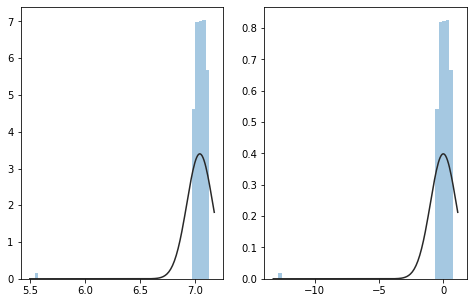

In [27]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_13 = DVT_normal['DVT control air press (PT43)'].dropna().values
sns.distplot(x0_13, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_13 = DVT_df_scaled['DVT'].values
sns.distplot(x1_13, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [28]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_DVT = x1_13.tolist()
Z_score_DVT_table = pd.DataFrame(data=Z_score_DVT,columns=['z-score'])
Z_score2_DVT = []
for i in range(len(Z_score_DVT)):
    if Z_score_DVT[i] < 0:
        Z_score2_DVT.append(Z_score_DVT[i]/Z_score_DVT_table.min().item())
    else:
        Z_score2_DVT.append(Z_score_DVT[i]/Z_score_DVT_table.max().item())
Z_score2_DVT_table = pd.DataFrame(data=Z_score2_DVT,columns=['z-score2'])     
Z_score3_DVT = []
for i in range(len(Z_score2_DVT)):
    Z_score3_DVT.append(1-Z_score2_DVT[i])
Z_score3_DVT
Z_score3_DVT_table = pd.DataFrame(data=Z_score3_DVT,columns=['z-score3'])
Z_score3_DVT_table

,z-score3
0,0.000000
1,0.000033
2,0.000067
3,0.000100
4,0.000133
...,...
23549,0.998764
23550,0.998808
23551,0.998864
23552,0.998919


In [33]:
FOP_normal = train_normal_mode2_all[['FO Pressure Engine Inlet']] # FOP = FO Pressure Engine Inlet
FOP_normal['FO Pressure Engine Inlet'] = pd.to_numeric(FOP_normal['FO Pressure Engine Inlet'])
FOP_feature_normal=FOP_normal.describe() # 연료압력 관련 통계치
FOP_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FO Pressure Engine Inlet
count,23554.000000
mean,10.353791
std,0.371420
min,5.350000
25%,10.349667
50%,10.361833
75%,10.395667
max,10.774000


In [34]:
scaler14 = StandardScaler() #연료압력 데이터 표준화
scaler14.fit(FOP_normal)
FOP_scaled = scaler14.transform(FOP_normal)
FOP_df_scaled = pd.DataFrame(data=FOP_scaled, columns=['연료압력'])
FOP_df_scaled

,연료압력
0,-13.458890
1,-13.460685
2,-13.462480
3,-13.464275
4,-13.465621
...,...
23549,0.124863
23550,0.125312
23551,0.125761
23552,0.126210


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

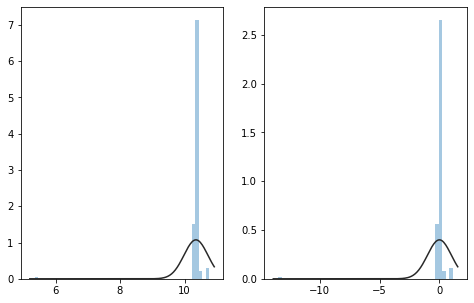

In [35]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_14 = FOP_normal['FO Pressure Engine Inlet'].dropna().values
sns.distplot(x0_14, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_14 = FOP_df_scaled['연료압력'].values
sns.distplot(x1_14, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [36]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_FOP = x1_14.tolist()
Z_score_FOP_table = pd.DataFrame(data=Z_score_FOP,columns=['z-score'])
Z_score2_FOP = []
for i in range(len(Z_score_FOP)):
    if Z_score_FOP[i] < 0:
        Z_score2_FOP.append(Z_score_FOP[i]/Z_score_FOP_table.min().item())
    else:
        Z_score2_FOP.append(Z_score_FOP[i]/Z_score_FOP_table.max().item())
Z_score2_FOP_table = pd.DataFrame(data=Z_score2_FOP,columns=['z-score2'])     
Z_score3_FOP = []
for i in range(len(Z_score2_FOP)):
    Z_score3_FOP.append(1-Z_score2_FOP[i])
Z_score3_FOP
Z_score3_FOP_table = pd.DataFrame(data=Z_score3_FOP,columns=['z-score3'])
Z_score3_FOP_table

,z-score3
0,0.000999
1,0.000866
2,0.000733
3,0.000600
4,0.000500
...,...
23549,0.889637
23550,0.889240
23551,0.888843
23552,0.888447


In [37]:
FOT_normal = train_normal_mode2_all[['FO Temperature Engine Inlet']] # FOT = FO Temperature Engine Inlet
FOT_normal['FO Temperature Engine Inlet'] = pd.to_numeric(FOT_normal['FO Temperature Engine Inlet'])
FOT_feature_normal=FOT_normal.describe() # 연료온도 관련 통계치
FOT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FO Temperature Engine Inlet
count,23554.000000
mean,60.141914
std,2.366146
min,33.000000
25%,60.000000
50%,60.000000
75%,60.000000
max,71.741667


In [38]:
scaler15 = StandardScaler() #연료온도 데이터 표준화
scaler15.fit(FOT_normal)
FOT_scaled = scaler15.transform(FOT_normal)
FOT_df_scaled = pd.DataFrame(data=FOT_scaled, columns=['연료온도'])
FOT_df_scaled

,연료온도
0,-11.471184
1,-11.471184
2,-11.471184
3,-11.471184
4,-11.471184
...,...
23549,-0.058569
23550,-0.058569
23551,-0.058569
23552,-0.058569


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

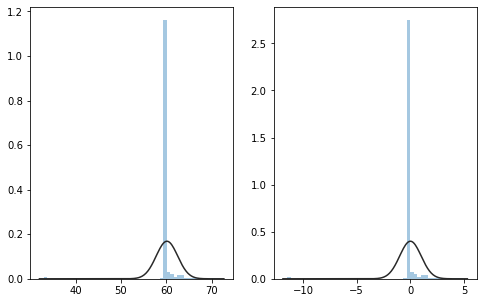

In [40]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_15 = FOT_normal['FO Temperature Engine Inlet'].dropna().values
sns.distplot(x0_15, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_15 = FOT_df_scaled['연료온도'].values
sns.distplot(x1_15, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [41]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_FOT = x1_15.tolist()
Z_score_FOT_table = pd.DataFrame(data=Z_score_FOT,columns=['z-score'])
Z_score2_FOT = []
for i in range(len(Z_score_FOT)):
    if Z_score_FOT[i] < 0:
        Z_score2_FOT.append(Z_score_FOT[i]/Z_score_FOT_table.min().item())
    else:
        Z_score2_FOT.append(Z_score_FOT[i]/Z_score_FOT_table.max().item())
Z_score2_FOT_table = pd.DataFrame(data=Z_score2_FOT,columns=['z-score2'])     
Z_score3_FOT = []
for i in range(len(Z_score2_FOT)):
    Z_score3_FOT.append(1-Z_score2_FOT[i])
Z_score3_FOT
Z_score3_FOT_table = pd.DataFrame(data=Z_score3_FOT,columns=['z-score3'])
Z_score3_FOT_table

,z-score3
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
23549,0.994894
23550,0.994894
23551,0.994894
23552,0.994894
